<a href="https://colab.research.google.com/github/BaekTree/TIBigdataMiddleware/blob/master/rnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

version : 다운 받은 데이터 버전

In [0]:
version = "intgStrct-01intgStrct-02intgStrct-05intgStrctstrct"
# intgStrct-01intgStrct-02intgStrct-05intgStrctstrct

In [11]:
import pandas as pd
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs'+version+'.csv')
data.columns.to_list()
data = data.drop_duplicates()

## 업로드한 데이터에서 불필요한 column들을 지운다.

In [13]:
for i in data.columns.to_list():
  if bool(i != "제목") ^ bool(i != "키워드") ^ bool(i != "주제"):
    print(i)
    data = data.drop([i], axis = 1)

Unnamed: 0
level_0
Unnamed: 0.1
index


# 데이터 정보 확인... 크기 혹은 주제...

## graph 그려서 보기

max length article :  10444
ave article length :  553.9822752194625


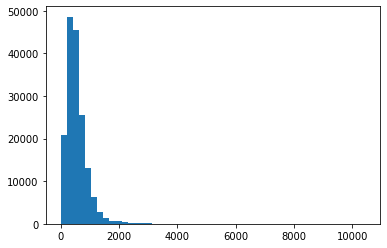

eco count :  40542
it count :  16971
innt count :  9576
cul count :  39443
pol count :  40746
soc count :  7660
spo count :  11947


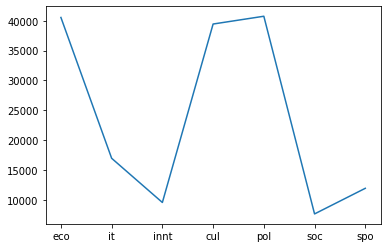

In [14]:
data = data.sort_values(by=["주제"])


topicList = list(set(data["주제"].to_list()))
# topicList = list(set(data.sort_values(by=["주제"])["주제"].to_list()))

data = data.astype(str)


keys = data["키워드"]
keys = keys.astype(str)

lst = keys.to_list()

print("max length article : ", max([len(i) for i in lst]))
print("ave article length : " , sum(map(len,lst))/len(lst) )

plt.hist([len(i) for i in lst], bins = 50)
plt.show()

y = []

import matplotlib.font_manager as fm
# plt.rcParams['font.family'] = 'NanumGothic'


font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)


for topic in topicList:
  sumVal = (data["주제"]==topic).sum()
  y.append(sumVal)
  print(topic ,"count : ", sumVal)

plt.xlabel("",fontproperties=fontprop)
plt.plot(topicList, y,)
plt.show()


## 개별 주제 확인해보기

In [15]:
data[data["주제"]=="cul"].head(30)

,제목,키워드,주제
27913,"`개그콘서트` 신봉선, 순백의 웨딩드레스 자태",개그콘서트 신봉선 순백 웨딩드레스 자태 양소영 매일경제 스타투데이 양소영 신봉선 개...,cul
28910,[그림과 詩가 있는 아침] 한 잔의 서울을 들이마시오/신현림,서울 신현림 서울 신현림 나무 피자 덩이요 요즘 사람 폭탄 마음 죄인 부익부 빈익 ...,cul
28911,[금요칼럼] 허균의 우정/백승종 한국기술교육대 겸임교수,허균 우정 백승종 한국기술교육대 겸임 교수 허균 사람 허성 허봉 누이 난설헌 문장 ...,cul
28912,"“일흔 셋, 음악 사랑 절정이다” 청바지 가죽재킷 입은 이장희",절정 음악 사랑 청바지 가죽재킷 이장희 1시간 울릉 건강관리 3월 데뷔 주년 콘서트...,cul
28913,호날두 인스타그램 팔로어 2억명 돌파,호날 인스타 팔로어 2억 돌파 축구 선수 크리스티아누 호날두 35 소셜미디어 인스타...,cul
28914,진은숙 작곡가 레오니 소닝 음악상 수상,진은숙 작곡가 레오니 소닝 음악 수상 독일 활동 작곡가 진은숙 덴마크 클래식 최고 ...,cul
28915,[여행수첩],여행수첩 대한항공 오스트리아 구간 오스트리아 운항 오스트리아 항공 루프트한자 항공 ...,cul
28916,[삶과 문화] 지키는 사람들,사람들 사용 승인 15일 연와조 지하 1층 지상 2층 성수동 주택 생일 크기 정보 ...,cul
28917,[이원의 시 한 송이] 텍스트(Text),텍스트 Text 1연 비유 사람 생각 사람 3연 가지 생각 사과 사과 생각 사과 수...,cul
28918,[새 책] 이언 매큐언 ‘차일드 인 타임’ 외,차일드 이언 매큐언 타임 문학 차일드 타임 이언 매큐언 민은영 수상작 휫브레드상 아...,cul


## 데이터 셔플

In [16]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head(10)

,제목,키워드,주제
41512,"한ㆍ미, 스톡홀름 회담서 북한에 ‘동창리 미사일실험장 폐기’ 재확인시켜",ㆍ미 스톡홀름 회담 북한 폐기 동창리 미사일 실험장 재확인 이달 중순 스웨덴 스톡홀...,pol
126871,"비밀유출 외교관 K씨 ""강효상, 악용할 줄 몰라 실수로 표현 유출""",비밀 유출 외교관 K씨 강효상 악용 실수 표현 유출 의원 강효상 자유한국당 한미 정...,pol
34386,"삼성전자 갤럭시Z 플립, 미국 FCC 인증 통과",플립 삼성전자 갤럭시 미국 FCC 인증 통과 삼성전자 폴더블 스마트폰 갤럭시 플립 ...,it
5527,"정의당, '5선 지역구' 안양 3곳 모두 출마",정의당 5선 지역구 안양 3곳 출마 정의당 4 의원들 여야 다선 의원 자리 지역구 ...,pol
120549,"‘지소연 2골 폭발’ 여자축구, 아르헨티나 5-0 완파",폭발 지소연 2골 여자축구 아르헨티나 완파 여자축구 국가대표팀 지메시 지소연 2골 ...,spo
1013,"민주당 “‘종로출마’ 황교안, 억지로 떠밀린 행보” 논평",민주당 종로출마 황교안 행보 논평 헤럴드경제 더불어민주당 9일 자유 한국당 황교안 ...,pol
47110,[편집국에서]‘제2의 박종철 의원’은 없어야,제2 박종철 의원 이름 댓글 기사 의원 박종철 예천군 사건 기사 해외 연수 폭행 독...,pol
31631,"멕시코 환경운동가, 실종 2주 만에 우물에서 숨진채 발견",멕시코 환경 운동가 실종 2주 우물 발견 멕시코 환경운동 곤잘레스 호메로 고메스 실...,innt
26368,"[포토] 윤여정, ‘거침없는 입담’",윤여정 입담 배우 윤여정 3일 코엑스 서울 강남구 삼성동 메가박스 진행 영화 지푸라...,cul
124269,“지나친 걱정 불안도 병” 20 30대도 ‘건강 염려증’,걱정 불안 20 건강 염려증 나이 사람들 생각 심혈관 질환 중증 질환 미세먼지 환경...,soc


# nan 확인


In [17]:
# data.isnull()
data.isnull().sum()

제목     0
키워드    0
주제     0
dtype: int64

In [18]:
data.head(20)

,제목,키워드,주제
41512,"한ㆍ미, 스톡홀름 회담서 북한에 ‘동창리 미사일실험장 폐기’ 재확인시켜",ㆍ미 스톡홀름 회담 북한 폐기 동창리 미사일 실험장 재확인 이달 중순 스웨덴 스톡홀...,pol
126871,"비밀유출 외교관 K씨 ""강효상, 악용할 줄 몰라 실수로 표현 유출""",비밀 유출 외교관 K씨 강효상 악용 실수 표현 유출 의원 강효상 자유한국당 한미 정...,pol
34386,"삼성전자 갤럭시Z 플립, 미국 FCC 인증 통과",플립 삼성전자 갤럭시 미국 FCC 인증 통과 삼성전자 폴더블 스마트폰 갤럭시 플립 ...,it
5527,"정의당, '5선 지역구' 안양 3곳 모두 출마",정의당 5선 지역구 안양 3곳 출마 정의당 4 의원들 여야 다선 의원 자리 지역구 ...,pol
120549,"‘지소연 2골 폭발’ 여자축구, 아르헨티나 5-0 완파",폭발 지소연 2골 여자축구 아르헨티나 완파 여자축구 국가대표팀 지메시 지소연 2골 ...,spo
1013,"민주당 “‘종로출마’ 황교안, 억지로 떠밀린 행보” 논평",민주당 종로출마 황교안 행보 논평 헤럴드경제 더불어민주당 9일 자유 한국당 황교안 ...,pol
47110,[편집국에서]‘제2의 박종철 의원’은 없어야,제2 박종철 의원 이름 댓글 기사 의원 박종철 예천군 사건 기사 해외 연수 폭행 독...,pol
31631,"멕시코 환경운동가, 실종 2주 만에 우물에서 숨진채 발견",멕시코 환경 운동가 실종 2주 우물 발견 멕시코 환경운동 곤잘레스 호메로 고메스 실...,innt
26368,"[포토] 윤여정, ‘거침없는 입담’",윤여정 입담 배우 윤여정 3일 코엑스 서울 강남구 삼성동 메가박스 진행 영화 지푸라...,cul
124269,“지나친 걱정 불안도 병” 20 30대도 ‘건강 염려증’,걱정 불안 20 건강 염려증 나이 사람들 생각 심혈관 질환 중증 질환 미세먼지 환경...,soc


In [0]:
# data = data.iloc[:100000,:]


# 주제 지우기 함수

In [0]:
def removeTopic(top):
  data = data.drop(data[data["주제"] == top].index)

  y = []
  topicList = list(set(data.sort_values(by=["주제"])["주제"].to_list()))

  import matplotlib.font_manager as fm
  # plt.rcParams['font.family'] = 'NanumGothic'


  font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
  fontprop = fm.FontProperties(fname=font_path, size=18)


  for topic in topicList:
    sumVal = (data["주제"]==topic).sum()
    y.append(sumVal)
    print(topic ,"count : ", sumVal)

  plt.xlabel("",fontproperties=fontprop)
  plt.plot(topicList, y,)
  plt.show()

  y = []

  import matplotlib.font_manager as fm
  # plt.rcParams['font.family'] = 'NanumGothic'


  font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
  fontprop = fm.FontProperties(fname=font_path, size=18)


  for topic in topicList:
    sumVal = (data["주제"]==topic).sum()
    y.append(sumVal)
    print(topic ,"count : ", sumVal)

  plt.xlabel("",fontproperties=fontprop)
  plt.plot(topicList, y,)
  plt.show()


In [0]:
# removeTopic("it")

## IT지우기

In [0]:
# data = data.drop(data[data["주제"].map(lambda i : i == "cul")].index)

In [0]:
# topicList = list(set(data.sort_values(by=["주제"])["주제"].to_list()))
# data = data.astype(str)

# keys = data["키워드"]
# keys = keys.astype(str)

# lst = keys.to_list()

# print("max length article : ", max([len(i) for i in lst]))
# print("ave article length : " , sum(map(len,lst))/len(lst) )

# plt.hist([len(i) for i in lst], bins = 50)
# plt.show()

# y = []

# import matplotlib.font_manager as fm
# # plt.rcParams['font.family'] = 'NanumGothic'


# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=18)


# for topic in topicList:
#   sumVal = (data["주제"]==topic).sum()
#   y.append(sumVal)
#   print(topic ,"count : ", sumVal)

# plt.xlabel("",fontproperties=fontprop)
# plt.plot(topicList, y,)
# plt.show()


# Keras

## 데이터 전처리

In [22]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
test = str(data["키워드"])

In [0]:
MAX_NB_WORDS = 5000
MAX_SEQUENCE_LENGTH = 500


In [0]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters = " ")
# 빈도가 높은 최대 50000개의 단어들로만 인덱싱

In [0]:
data["키워드"] = data["키워드"].astype(str)

In [27]:
tokenizer.fit_on_texts(data["키워드"].values)
#padas와 호완이 된다. string array을 넣는다.
# string array을 넣으면 각 string element에서 계산을 다 해서
# 단어들을 indexing한다.
# word_index : 전체 문서 셋에서 단어에 idx 매핑 전체 문서 셋에서 단어 빈도수 따라서 
# 빈도 수 높을 수록 낮은 숫자에 매핑. 단어 -> 숫자 매핑
# index_word : word_index의 반대 표현. object에서 숫자 -> 단어 매핑.
# 일단 indexing은...
"""
from : https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
fit_on_texts Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).
texts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.
"""




'\nfrom : https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do\nfit_on_texts Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).\ntexts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.\n'

In [28]:
word_index = tokenizer.word_index
print(f"found %s unique tokens." %len(word_index))

found 567490 unique tokens.


In [0]:
# tokenizer.word_index

In [0]:
# tokenizer.word_counts

In [0]:
# 위에서 각 단어 -> 정수 매핑했다.
# 이제 문서를 정수 표현으로 바꾼다.
X = tokenizer.texts_to_sequences(data["키워드"].values)


In [0]:
# len(X)
# X.shape

In [0]:
from keras.preprocessing.sequence import pad_sequences


In [34]:
X = pad_sequences(X, maxlen = MAX_SEQUENCE_LENGTH)
print("shape of data tensor: ", X.shape)

shape of data tensor:  (166885, 500)


In [35]:
X

array([[   0,    0,    0, ...,  125,   51,   56],
       [   0,    0,    0, ..., 1207,  176,  110],
       [   0,    0,    0, ...,  981, 1300,   27],
       ...,
       [   0,    0,    0, ..., 1084,  198,  298],
       [   0,    0,    0, ..., 3394, 2981, 1442],
       [   0,    0,    0, ...,  199,   81,  181]], dtype=int32)

### 이제 카테고리 값을 설정하자.
* 각각의 카테고리에 원 핫 인코딩을 한다.
* 특정한... 기준에 따라 각각의 list의 값에 원핫인코딩을 시킨다.
* get_dummies함수를 사용.
* 실제 모델에 들어갈 Y는 값이 필요하므로 values값 적용.
* 어느 주제가 몇번째 1으로 인코딩되었는지 확인하려면 head으로 표현
* 이 순서를 사용해서 실제 카테고리를 표현한다.

In [36]:
# Y = pd.get_dummies(data["주제"]).values
topicDummy = pd.get_dummies(data["주제"])
Y = topicDummy.values
topicDummy.head()

,cul,eco,innt,it,pol,soc,spo
41512,0,0,0,0,1,0,0
126871,0,0,0,0,1,0,0
34386,0,0,0,1,0,0,0
5527,0,0,0,0,1,0,0
120549,0,0,0,0,0,0,1


In [37]:
topicDummy.columns

Index(['cul', 'eco', 'innt', 'it', 'pol', 'soc', 'spo'], dtype='object')

In [0]:
print("shale of label tensor:", Y.shape)

shale of label tensor: (166885, 7)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 42)

In [0]:
print(X_train.shape, Y_train.shape)

(150196, 500) (150196, 7)


In [0]:
print(X_test.shape, Y_test.shape)

(16689, 500) (16689, 7)


## 학습

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, Embedding, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping



### 함수... depreciated

In [0]:
# EMBEDDING_DIM = 256

# def runModel(EMBEDDING_DIM = 256, lstmLayer = 128, layerNum = 1, layerSet = [128], epochs = 2, batch_size = 64, reluDense = False, biDir = False, method = CuDNNLSTM):
#   model = Sequential()

#   model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
#   model.add(SpatialDropout1D(0.2))
#   if method == LSTM:
#     method = LSTM
#   if biDir == True:
#     print("biDir is True")
#     model.add(Bidirectional(method(lstmLayer,return_sequences=True)))

#     if layerNum > 1:
#       print("layer num > 1")
#       for i in range(layerNum - 1):
#         print("add ",i,"th layer")
#         model.add(method(lstmLayer,return_sequences=True)) 
#         model.add(Dropout(0.2))
#     elif len(layerSet) > 1:
#       print("len(layerSet) > 1")
#       for i, layerWid in enumerate(layerSet):
#         print("add ",i,"th layer")
#         model.add(method(layerWid,return_sequences=True)) 
#         model.add(Dropout(0.2)) 
#     else:
#       model.add(Bidirectional(method(lstmLayer)))
#   # model.add(method(128,return_sequences=True)) 
#   # model.add(Dropout(0.2))
#   # model.add(Dense(7, activation='softmax'))

#   # model.add(method(128,return_sequences=True)) 
#   # model.add(Dropout(0.2))

#   # model.add(method(128,return_sequences=True)) 
#   # model.add(Dropout(0.2))

#   # model.add(method(128,return_sequences=True)) 
#   # model.add(Dropout(0.2))
#   else:
#     # model.add(SpatialDropout1D(0.2))

#     if layerNum > 1:
#       for i in range(layerNum - 1):
#         print("add ",i,"th layer")
#         model.add(method(lstmLayer,return_sequences=True)) 
#         model.add(Dropout(0.2))
#     elif len(layerSet) > 1:
#       for i, layerWid in enumerate(layerSet):
#         print("add ",i,"th layer")
#         model.add(CuDNNLSTM(layerWid,return_sequences=True)) 
#         model.add(Dropout(0.2))

#   model.add(method(lstmLayer)) 
#   model.add(Dropout(0.2))

#   # model.add(Dense(32,activation='relu'))

#   # model.add(LSTM(100, dropout = 0.2, recurrent_dropout=0.2))

#   if reluDense == True:
#     model.add(Dense(EMBEDDING_DIM, activation = 'relu'))
#     model.add(Dropout(0.2))

#   model.add(Dense(9, activation='softmax'))
#   opt = tf.keras.optimizers.Adam(lr=1e-3, decay = 1e-5)
#   model.summary()
#   # model.compile(loss='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
#   # model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#   model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#   # epochs = 2
#   # batch_size = 64

#   history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#   #accuracy show
#   accr = model.evaluate(X_test,Y_test)
#   print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#   #accuracy graph
#   plt.title('Loss')
#   plt.plot(history.history['loss'], label='train')
#   plt.plot(history.history['val_loss'], label='test')
#   plt.legend()
#   plt.show();

#   plt.title('Accuracy')
#   plt.plot(history.history['acc'], label='train')
#   plt.plot(history.history['val_acc'], label='test')
#   plt.legend()
#   plt.show();

### 기본적인 모델
* 그런데 epoch =1, 과 2일 때 차이가 0.3이 난다. 에폭을 더 늘려서 시도해볼 필요성이 있어보인다.
* 에폭 = 2 -> 8.3
* 에폭 = 5- > 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 512)         2560000   
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 512)               2101248   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 1799      
Total params: 4,794,375
Trainable params: 4,794,375
Non-trainable params: 0
____________________________________________

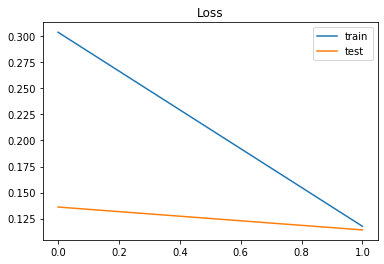

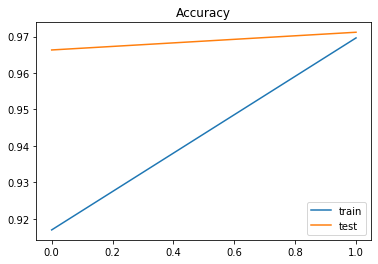

In [0]:


model = Sequential()
EMBEDDING_DIM = 512
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))

model.add(CuDNNLSTM(EMBEDDING_DIM)) 
model.add(Dropout(0.2))
model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(len(topicList), activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


epochs = 2
batch_size = 64
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#accuracy show
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#accuracy graph
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

### 버리기 dropout = 0.4
* 과적합을 없애보자!

In [0]:


# model = Sequential()
# EMBEDDING_DIM = 512
# model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))

# model.add(CuDNNLSTM(EMBEDDING_DIM)) 
# model.add(Dropout(0.4))
# model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
# model.add(Dropout(0.4))

# model.add(Dense(7, activation='softmax'))
# model.summary()
# model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# epochs = 10
# batch_size = 64
# history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# #accuracy show
# accr = model.evaluate(X_test,Y_test)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# #accuracy graph
# plt.title('Loss')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show();

# plt.title('Accuracy')
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='test')
# plt.legend()
# plt.show();

### biDirectional model
별 차이가 없다... 여전히 에폭 수를 늘리는 것을 고려해보아야...

In [0]:
# model = Sequential()
# EMBEDDING_DIM = 64
# model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
# model.add(Bidirectional(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)))

# # model.add(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)) 
# model.add(CuDNNLSTM(EMBEDDING_DIM)) 
# model.add(Dense(7, activation='softmax'))
# model.summary()
# model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# epochs = 10
# batch_size = 64
# history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# #accuracy show
# accr = model.evaluate(X_test,Y_test)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# #accuracy graph
# plt.title('Loss')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show();

# plt.title('Accuracy')
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='test')
# plt.legend()
# plt.show();

### dense 30을 추가한 모형
* 고만고만...

In [0]:
# model = Sequential()
# EMBEDDING_DIM = 64
# model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
# # model.add(Bidirectional(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)))

# # model.add(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)) 
# model.add(CuDNNLSTM(EMBEDDING_DIM)) 
# model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
# model.add(Dense(9, activation='softmax'))
# model.summary()
# model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# epochs = 2
# batch_size = 64
# history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# #accuracy show
# accr = model.evaluate(X_test,Y_test)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# #accuracy graph
# plt.title('Loss')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show();

# plt.title('Accuracy')
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='test')
# plt.legend()
# plt.show();

### 노드 수 512
* 조금 커졌지만... 과적합

In [0]:
/

()

### spatial layer 모형

In [0]:
# model = Sequential()
# EMBEDDING_DIM = 512
# model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
# # model.add(Bidirectional(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)))
# model.add(SpatialDropout1D(0.2))

# # model.add(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)) 
# model.add(CuDNNLSTM(EMBEDDING_DIM)) 
# model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
# model.add(Dense(7, activation='softmax'))
# model.summary()
# model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# epochs = 2
# batch_size = 64
# history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# #accuracy show
# accr = model.evaluate(X_test,Y_test)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# #accuracy graph
# plt.title('Loss')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show();

# plt.title('Accuracy')
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='test')
# plt.legend()
# plt.show();

In [0]:
# 

In [0]:
# model = Sequential()
# EMBEDDING_DIM = 256
# model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
# # model.add(Bidirectional(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)))
# # model.add(SpatialDropout1D(0.2))

# # model.add(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)) 
# model.add(CuDNNLSTM(EMBEDDING_DIM)) 
# model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
# model.add(Dense(9, activation='softmax'))
# model.summary()
# model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# epochs = 10
# batch_size = 64
# history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# #accuracy show
# accr = model.evaluate(X_test,Y_test)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# #accuracy graph
# plt.title('Loss')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show();

# plt.title('Accuracy')
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='test')
# plt.legend()
# plt.show();

In [0]:
# runModel(64,64, layerNum=1, batch_size = 32, epochs = 2, reluDense=True)#, biDir = True

In [0]:
# runModel(512,512, layerNum=1, batch_size = 256, epochs = 2, reluDense=True)#, biDir = True)

In [0]:
# runModel(64,64, layerNum=8, batch_size = 256, epochs = 2, reluDense=True)#, biDir = True)

In [0]:
# runModel(64,64, layerNum=3, batch_size = 256, epochs = 2, reluDense=True)#, biDir = True)

In [0]:
# runModel(64,64, batch_size = 256, epochs = 2, reluDense=True, biDir = True)# batch size 128 was fine... not overfitting. Test overcomes trains.

In [0]:
# runModel(64,64, batch_size = 128, epochs = 2, reluDense=True, biDir = True)

In [0]:
# runModel(256,256)

In [0]:
# runModel(512,256)

In [0]:
# runModel(512,512)

In [0]:
# runModel(128,128, layerNum = 2)

In [0]:
# runModel(128,128, layerNum = 3)

In [0]:
# runModel(128,128, layerNum = 3, batch_size = 32)

In [0]:
# runModel(128,128, layerNum = 3, batch_size = 32, epoch = 10)

In [0]:
# # max num : 50000 -> 5000
# runModel(64,64, layerNum = 3, batch_size = 32, epochs = 10, reluDense=True)

In [0]:
# runModel(64,64, batch_size = 32, epochs = 2, reluDense=True, biDir = True)

In [0]:
# runModel(128,128, layerNum = 3, batch_size = 16)

In [0]:
# runModel(128,128, layerNum = 3, batch_size = 128)

In [0]:
# runModel(128,128, layerNum = 3, batch_size = 256)

In [0]:
# runModel(512,512, epochs = 10)

In [0]:
# runModel(256, 64, layerNum = 4)

In [0]:
# runModel(256,256,epochs = 4)

In [0]:
# runModel(256,256,batch_size = )

# 개별 테스트

In [0]:
test = ["""
봉준호 감독의 영화 '기생충'이 지난 9일(현지시간) 아카데미 시상식에서 4관왕을 차지한 뒤 정치권에서도 봉 감독과 '기생충'의 쾌거에 찬사를 보내고 있다. 자유한국당에서도 "기념비적인 사건"이라며 봉 감독을 치켜세웠는데, 진중권 전 동양대 교수는 이를 두고 "얼굴이 두텁다(두껍다)"고 비판했다.

진 전 교수는 11일 자신의 페이스북을 통해 "한국의 보수, 절망적이다"라고 했다. 진 전 교수는 "봉준호 감독은 블랙리스트에 올려놓고, CJ 이미경 부회장은 자리에서 끌어내려 미국으로 망명 보냈던 분들 아닌가"라며 "이제 와서 봉준호 감독의 쾌거에 숟가락 올려놓으려 하다니 얼굴도 참 두터우시다"라고 비꼬았다.

전날인 10일 박용찬 자유한국당 대변인은 '기생충' 오스카 수상 소식이 전해지자 논평을 내고 "한국 영화 기생충이 새로운 역사를 썼다"며 "지난해 칸영화제 황금종려상을 시작으로 연이어 들려온 놀라운 소식"이라고 했다. 한국당은 또 "전 세계에 한국 영화, 한국 문화의 힘을 알린 기념비적인 사건이라 할 수 있을 것"이라고 부연했다.

또 강효상 자유한국당 의원도 이날 자유한국당 원내대책회의에서 "대구신청사 옆 두류 공원에 '봉준호 영화박물관'을 건립해 대구신청사와 함께 세계적인 영화테마 관광메카로 만들겠다"고 말했다. 봉 감독이 대구출신이라는 이유에서 나온 발언이다.

이에 대해서도 진 전 교수는 박정희 전 대통령 생가복원 마인드라고 꼬집으면서 "이 소식이 외신으로 나가면 문화강국 한국의 이미지에 먹칠을 할 것"이라고 비난했다. 그러면서 "이분들, 마인드가 딱 70년대에 가 있다"고 비판하기도 했다.

이명박 정부 시기에는 봉 감독을 포함해 영화인 52명이 블랙리스트에 올랐다. 특히 당시 청와대 기획관리실에서 작성한 내부 문건에는 봉 감독의 영화 '괴물'을 "대중이 쉽게 접하고 무의식중에 좌파 메시지에 동조하게 만드는 좋은 수단인 영화를 중심으로 국민의식 좌경화 추진" 사례로 들었다.

문화예술계 블랙리스트 진상조사 및 제도개선위원회가 지난해 2월 발간한 '문화예술계 블랙리스트 진상조사 및 제도개선위원회 백서'에는 '괴물'을 포함해 '설국열차', '살인의 추억' 등 봉 감독의 영화 세 편이 블랙리스트 영화로 등장한다.

봉 감독 외에도 배우 송강호 역시 '문화체육관광부 9473명 명단'에 블랙리스트로 등장한다. 송강호는 문화예술인 594명이 2015년 5월 1일 발표한 '세월호 정부 시행령 폐기 촉구 성명'을 발표해 블랙리스트에 포함됐다.
"""]



In [0]:
seq = tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen = MAX_SEQUENCE_LENGTH)


In [0]:
pred = model.predict(padded)

In [0]:
labels = topicList

In [0]:
import numpy as np


In [0]:
print(pred, labels[np.argmax(pred)])
# pred

[[9.9705219e-01 6.0982292e-04 6.6182212e-05 3.7845381e-04 1.5474918e-03
  4.5299566e-05 3.0047068e-04]] soc


In [0]:
model.save('drive/My Drive/Colab Notebooks/Machine Learning/RNN/my_model'+version+'.h5')


In [0]:
from tensorflow import keras
new_model = keras.models.load_model('drive/My Drive/Colab Notebooks/Machine Learning/RNN/my_model'+version+'.h5')
model = new_model

In [0]:
pred = new_model.predict(padded)
print(pred, labels[np.argmax(pred)])


[[9.9705219e-01 6.0982292e-04 6.6182212e-05 3.7845381e-04 1.5474918e-03
  4.5299566e-05 3.0047068e-04]] soc


In [0]:
test = ["""
 남북물류포럼 칼럼 제350호사드배치 알 박기, 진정 국익을 위한 것일까?추 원 서남북물류포럼 수석부회장지난달 말 롯데가 국방부와 성주골프장을 고고도미사일방어체계(THAAD·사드) 부지로 제공하는 계약을 체결한 이후, 한·중 간 갈등이 표면화되면서 중국의 보복이 노골화하고 있다. 거듭되는 중국의 반대와 경고에도 불구하고 한미 당국이 사드의 조기 배치 의지를 재천명하며 절차를 신속히 진행하는 움직임을 보이자, 중국은 이미 시행되던 경고성 조치를 넘어 롯데에 대한 '보복'을 시작으로 전방위 경제 및 문화 보복에 나서고 있다. 경제적 측면에서 당장 예상되는 커다란 손실은 물론, 앞으로 정치․외교․사회․군사 등 여러 방면에서도 심대한 피해와 후유증이 우려되고 있다. 만일, 사태가 장기화한다면 지난 25년 간 어렵게 축적해온 중국인의 한국에 대한 신뢰와 우호적 정서마저 크게 손상될 것이라는 것은 불문가지다. 물론, 상호의존도가 높은 글로벌 경제 하에서 중국이 입을 손실 역시 작지는 않을 것이다. 우리는 중국의 보복조치를 유감스럽게 생각하면서도, 중국이 사드배치를 왜 그토록 강하게 반대하는 상황에서 한국 정부가 알박기 하듯, 서둘러 사드 배치를 강행하는 것이 과연 국가의 장래에 도움이 될 것인지를 생각해 볼 필요가 있다. 결론부터 말한다면 현 정부는 사드 배치의 성급한 추진을 잠정 중단하고 차기 정부에 넘기는 것이 합당하고 현명하다는 것이다. 그 이유는 다음과 같다.첫째, 사드배치는 북한 핵 위협에 대처하는 방위적 조치라는 말로 설명할 수 있는 단순한 문제가 아니기 때문이다. 사드배치는 동북아 안보지형과 세력균형을 근본적으로 흔드는 사건이다. 중국이 반대하는 이유는 바로 여기에 있다. 미국은 부상하는 중국을 견제하기 위해 일본의 군사대국화를 용인하면서, 한국을 묶는 전략을 구사하고 있다. 중국은 사드가 미국의 대중국 포위전략의 일환이며, 액스밴드 레이더를 통해 자신을 근접거리에서 감시함으로써 유사 시 중국의 대응능력을 크게 훼손할 것을 우려하고 있다. 또한 이를 계기로 한국이 미국과 일본이 추진하는 미사일방어망(MD)에 편입되어 자신을 향해 칼날을 겨누게 될 것을 우려한다. 이에 대해 한국 정부는 사드배치는 어디까지나 북한의 핵·미사일 위협에 대비하기 위한 방위용이며 미국이 추진하는 MD 참여와는 관련이 없다는 것을 누차 강조해왔다. 실제로 한국은 김대중 정부 이래 지역 MD 체계 편입에 반대한다는 입장을 유지해 온 것이 사실이다. 3분 내외면 북한 미사일이 한국에 도달할 수 있기 때문에 MD의 효용성이 낮을 뿐 아니라, 자칫하면 미․중 간 군사적 대립에 말려들 소지가 있다고 보았기 때문이다. 그러나 최근 미국의 의도가 한국을 미사일 방어망에 편입시키려는 것에 있음이 밝혀짐으로써 한국 정부의 주장이 무색하게 되고 말았다. 지난 2월 23일 트럼프 대통령은 “한국과 일본에 미사일 방어체계(MD)를 강화하겠다”며 한국을 특정하여 MD 편입을 시사한 것이 그것이다. 따라서 중국에 있어 사드배치는 미·중 간 군사적 완충지대 역할을 자임해오던 한국이 미국 및 일본의 미사일 공동망의 참여를 통해 중국에 대항하겠다는 것이나 마찬가지가 되었다. 해양세력과 대륙세력의 파워게임에 한국이 해양세력의 편을 들어 중국에 맞서는 형국이 되는 것이다. 둘째, 성급한 사드 배치 추진은 자칫하면 군사적 자주권의 상실과 한반도의 발칸화로 이어질 가능성이 높다는 점이다. 만일, 중국의 양해 없이 사드배치가 이루어졌다고 가정해 보자. 우리 사회 일각에서 주장하는 것처럼 당장은 중국의 압력에 맞서 군사적 주권을 지켰다고 큰소리칠 수는 있다. 그러나 이후의 상황은 어떻게 전개될까? 한국은 앞으로 북한 외에 중국과 러시아의 위협에 대처하기 위해 군사력을 더욱 증대할 수밖에 없다. 또한 어쩔 수 없이 미국에게 안보를 더욱 의존하지 않으면 안 되는 상황에 내몰리게 될 것이다. 미국은 당연히 한국의 부담 하에 사드의 추가배치를 요구할 것이며, 동중국해와 남중국해에서 중국의 군사력을 견제할 목적으로 제주나 진해항에 줌왈트호 등 미해군력의 배치 허용을 요구할 것이다. 이때 한국은 중국의 위협을 의식, 미국의 요구를 들어주지 않을 수 없게 된다. 한반도 평화와 안정을 위한 한·미동맹이 동아시아에서 미국의 군사적 이익을 추종하는 공격적 동맹으로 변질됨으로써 ‘한반도의 발칸화’라는 최악의 안보불안을 자초하게 될 것이다.셋째, 사드의 군사적 효용성을 포함한 배치의 적합성에 대한 신중한 검토가 필요하기 때문이다. 지난해 사드 배치 결정 과정은 국내에서 충분한 논의와 검토 없이 이루어졌다. 주무부처인 국방부마저 앞뒤가 맞지 않는 논리로 사드배치의 타당성만 강조했다. 의사결정 메커니즘의 허술함을 짐작하게 하고도 남는다. 정부는 물론, 국회 내에서라도 충분한 논의와 공론 과정을 거쳤더라면 사드배치의 부적합에 따른 대안을 모색했을 것이다. 설사 불가피하게 필요하다는 판단에 이르렀더라도 국민들을 충분히 설득하고 이웃인 중국의 우려를 덜어주는 방안을 강구함은 물론, 설득할 수 있는 시간적 여유를 확보할 수 있었을 것이다. 넷째, 북핵문제 해결과 한반도 평화통일이라는 대의를 위해서라도 반드시 중국의 협력을 얻는 외교적 노력이 절실하기 때문이다. 북핵문제 해결의 주요 당사자인 중국을 적대시한다면 앞으로 과연 중국이 북핵문제 해결에 적극적으로 나설 수 있을까? 북한 핵은 기정사실화 되고 다시는 북한 핵문제를 해결할 수 있는 기회를 갖지 못하게 될 것이다. 뿐만 아니라 향후 남북의 통일과정에서 중국은 한국의 통일을 지지하고 협력하는데 주저하게 될 것이다. 마지막 이유는 차기 정부가 나서서 남북관계 복원을 포함한 큰 그림 속에서 사드배치와 핵문제 등 현안을 해결할 수 있도록 해주는 것이 정치적 도의라고 믿기 때문이다. 국내외적으로 사면초가에 처해있는 현 정부가 굳이 엄청난 희생을 무릅쓰고서라도 사드의 신속한 배치를 결행해야 할 만큼 절실하고 시급한 상황에 처해 있는 지 자문해볼 필요가 있다. 만일 그게 아니라면 지금이라도 미국에 양해를 구하여 사드 배치 추진 문제를 차기 정부에 넘기는 것이 올바른 선택일 것이다. 갓 취임한 트럼프 대통령 역시 그것이 선거로 선출되는 민주주의 정부에서 오히려 당연한 도리라는 점을 누구보다도 잘 이해하고 있을 것이다.(끝) 김정남  |   2017-03-08        지난 10년간 천문학적인 국방비를 지출하면서도 왜 핵개발을 추진하지 않아서 이런 형국까지 당하는지 이해를 하기가 힘들다.돈이 없는가? 기술이 없는가? 모두 있으면서도 유독 핵우산에 의존한 당연한 귀결이니 답답할 뿐이다. 함무라비법전에도 있듯이 핵에는 핵으로 균형을 맞추어야 한다. 최소의 비용으로 최대의 공포를 줄 수 있는 핵개발을 북한이 포기할 까닭이 없다.지금이라도 늦지 않았으니 당당하게 자위차원에서 핵개발을 선언하여야 한다. 그래야 중국에게도 공격의 빌미를 주지 않고 핵의 균형을 갖춰서 정은이 망나니가 우쭐대지 못하고 대화의 광장으로 나올 가능성이 조금이라도 높아진다. 남의 힘을 빌려 내집을 지키다보면 결국 살림살이 모두 내어주며 바보가 되고 그 피해는 고스란이 한민족전체에게 돌아간다.미국도 힘쎈자는 대우한다. 일본을 대하는 그들의 태도가 이를 여실히 보여주지 않는가! 곽태환  |   2017-03-06        추원서 박사가 사드의 실전배치를 다음 정권에 넘기자는 5가지 이유를 잘 정리해줘서 감사하고 공감한다. 한미정부가 사드배치결정의 단순한 안보논리는 북한의 핵. 미사일 위협에 대응하여 사드배치 한다는 논리이다. 이러한 안보논리의 기본적인 전제조건이 오류가 있다. 북한이 핵전쟁을 한다는 가정이다. 만약 북한이 핵탄두 미사일 발사 결정은 무엇을 의미하는가? 북한이 핵 전쟁을 각오하고 핵미사일을 남쪽을 향하여 발사해야 한다는 것은 핵전쟁을 하겠다는 것인데 이것은 자살행위이고 과연 핵전쟁을 할 의도가 있다고 가정이 오류가 아닌가? 북한은 핵억지력을 강화하는 이유는 핵전쟁을 방지하기 위해 자위권차원에서 핵무기를 보유한다고 하는데 만약 핵 억지력이 깨지면 핵전쟁이 발생하는데 이것은 공멸을 의미하는데 사드가 불필요하게 될 것이다. 사드가 어떻게 핵 전쟁을 예방 할 수 있는지 한미군부에게 묻고 싶다.
"""]

In [0]:
def clsfy(test):
  seq = tokenizer.texts_to_sequences(test)
  padded = pad_sequences(seq, maxlen = MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  print(pred, labels[np.argmax(pred)])


In [0]:
clsfy(test)

[[1.6239221e-04 5.6052355e-05 9.8635019e-06 1.2091056e-05 9.9974662e-01
  1.0783431e-05 2.3049197e-06]] cul


#  TIB real data test

In [4]:
from tensorflow import keras

new_model = keras.models.load_model('drive/My Drive/Colab Notebooks/Machine Learning/RNN/my_model1201.h5')



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
kubic = pd.read_json("drive/My Drive/Colab Notebooks/Machine Learning/RNN/refined620.json",encoding="utf-8")
print(kubic[kubic["idList"]=="5de110404b79a29a5f987fe8"])
# kubic.head(5)
for i in range(kubic.shape[0]):
  kubic.loc[i,"tokenized_doc"] = " ".join(kubic["tokenized_doc"][i])
kubic.head(2)

                     idList  ...                                           conetnts
9  5de110404b79a29a5f987fe8  ...  \n Ú Î¡§ •(pdf» ¿œ).pdf\n2004 | 2004 | 2004 | ...

[1 rows x 4 columns]


,idList,titles,tokenized_doc,conetnts
0,5de110274b79a29a5f987f1d,2012년 3차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 원칙 입각 대북 정책 성과 과제 정치 한반도 평화 국제 ...,www.nuac.go.kr대북정책 추진에 관한 정책건의\n2012. 10.차 례...
1,5de1102a4b79a29a5f987f39,2017년 3차 통일정책 추진에 관한 정책건의 보고서,상임 위원회 대북 통일 정책 추진 정책 건의 평화 한반도 구현 과제 민주 평화통일 ...,\n2017 상임위원회대북·통일정책 추진에 관한 정책건의- 평화로운 한반도 구현을 ...


In [0]:
kubic["주제"] = None


In [0]:
import numpy as np

In [0]:
topicList = topicDummy.columns
# print(topicList2)
# print(topicList)

In [0]:
for i, cont in enumerate(kubic["tokenized_doc"]):
  test = []
  test.append(cont)
  seq = tokenizer.texts_to_sequences(test)
  padded = pad_sequences(seq, maxlen = MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  #pol innt soc cul eco spo
  labels = topicList
  # labels = ['pol', 'eco', 'cul', 'innt', 'spo', 'soc']
  kubic.loc[i,"주제"] = labels[np.argmax(pred)]
  # print(kubic["post_title"][i] , " : ", labels[np.argmax(pred)])
  # print(pred, labels[np.argmax(pred)])

In [46]:
for top in topicList:
  print(kubic[kubic["주제"]==top][["tokenized_doc","주제"]].head(20),"\n")

                                        tokenized_doc   주제
11  차통 한정 통일 정책 추진 정책 건의 통일 정책 추진 정책 건의 통일 정책 추진 정...  cul
30  차통 한정 통일 정책 추진 정책 건의 통일 정책 추진 정책 건의 통일 정책 추진 정...  cul
48                      한글 맞춤법 문법 검사 사이트 회원 신고 게시물 신고  cul
49                이력서 서식 한글 파일 이력서 단순 회원 금란 신고 게시물 신고  cul
50                    국립 국어 한글 맞춤법 교육 자료 회원 신고 게시물 신고  cul
52  목적의식 행동 취직 희망 사람 모두 지명도 회사 입사 회사 소수 현실 때문 기업 지...  cul
53  콩깍지 콩깍지 콩깍지 간장 공장 공장장 공장장 된장 공장 공장장 공장장 장년 장수 ...  cul
56  자기 소개 동안 자기 자신 장점 단점 말씀 당신 개성 생각 특기 리더십 생각 협조 ...  cul
57  뉴스 앵커 녹음 표준말 어법 여러분 어법 비교 발음 속도 강세 운율 연습 영어 운율...  cul
59  구인 등록 신청서 서식 파일 구인 등록 신청서 회원 유원 요벨 박진섭 태화 신고 게...  cul
61     첨부 파일 다운로드 작성 사용 이력서 자기 소개서 회원 금란 요벨 신고 게시물 신고  cul
86                                           첨부 파일 클릭  cul
87                                           첨부 파일 클릭  cul
89                                           첨부 파일 클릭  cul
90                                           첨부 파일 클릭  cul
91                                           첨부 파일 클릭  c

max length article :  1
ave article length :  1.0


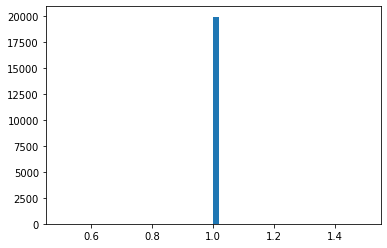

cul count :  82
eco count :  30
innt count :  31
it count :  7
pol count :  385
soc count :  29
spo count :  0


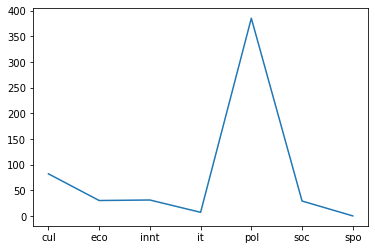

In [47]:
kubicList = list(set(kubic.sort_values(by=["주제"])["주제"].to_list()))
kubic = kubic.astype(str)

keys = kubic["tokenized_doc"][0]
# keys = keys.astype(str)

# lst = keys.to_list()
lst = keys
print("max length article : ", max([len(i) for i in lst]))
print("ave article length : " , sum(map(len,lst))/len(lst) )

plt.hist([len(i) for i in lst], bins = 50)
plt.show()

y = []

import matplotlib.font_manager as fm
# plt.rcParams['font.family'] = 'NanumGothic'


font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)


for topic in topicList:
  sumVal = (kubic["주제"]==topic).sum()
  y.append(sumVal)
  print(topic ,"count : ", sumVal)

plt.xlabel("",fontproperties=fontprop)
plt.plot(topicList, y,)
plt.show()


In [48]:
kubic[kubic["주제"]=="pol"].head(10)

,idList,titles,tokenized_doc,conetnts,주제
0,5de110274b79a29a5f987f1d,2012년 3차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 원칙 입각 대북 정책 성과 과제 정치 한반도 평화 국제 ...,www.nuac.go.kr대북정책 추진에 관한 정책건의\n2012. 10.차 례...,pol
1,5de1102a4b79a29a5f987f39,2017년 3차 통일정책 추진에 관한 정책건의 보고서,상임 위원회 대북 통일 정책 추진 정책 건의 평화 한반도 구현 과제 민주 평화통일 ...,\n2017 상임위원회대북·통일정책 추진에 관한 정책건의- 평화로운 한반도 구현을 ...,pol
2,5de1102c4b79a29a5f987f42,2012년 1차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 대북 정책 추진 정책 건의 한정 대북 정책 추진 정책 건...,www.nuac.go.kr\n대북정책 추진에 관한 정책건의대북정책 추진에 관한 정...,pol
3,5de1102f4b79a29a5f987f51,2017년 1차 통일정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 대내외 통일 환경 변화 통일 대북 정책 추진 방향 통일 ...,www.nuac.go.kr통일정책 추진에 관한정책건의2017 1차 대내외 통일환경...,pol
4,5de1102f4b79a29a5f987f60,2017년 2차 통일정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 대북 통일 정책 추진 방향 실행 과제 통일 정책 외교 안...,www.nuac.go.kr통일정책 추진에 관한정책건의2017. 2차 대북·통일정책...,pol
5,5de110324b79a29a5f987f72,2013년 2차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 대북 정책 내지 오전 보고서 민주 평화통일 자문 회의 분...,www.nuac.go.kr2013. 7.\n대북정책 추진에 관한 정책건의대북정책_내...,pol
6,5de110354b79a29a5f987f82,2012년 2차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 운영 상임 협의 회장 합동 회의 오후 보고서 민주 평화 ...,www.nuac.go.kr대북정책 추진에 관한 정책건의\n운영·상임·협의회장 합동...,pol
7,5de110354b79a29a5f987f93,2016년 2차 대북정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 보고서 민주 평화 통일 문회 분과 위원회 심의 자문 위원...,www.nuac.go.kr2016년 2차통일정책 추진에 관한 정책건의본 보고서는 민...,pol
8,5de1103d4b79a29a5f987fc6,2014년 2차 대북정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 보고서 민주 평화 통일 문회 분과 위원회 심의 자문 위원...,www.nuac.go.kr통일정책 추진에 관한 정책건의\n2014년 2차본 보고서...,pol
10,5de110404b79a29a5f987fed,2019년 2차 통일정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 평화 발전 한반도 체제 남북 평화 협력 증진 방안 국제 ...,www.nuac.go.kr통일정책 추진에 관한정책건의2019. 2차 (평...,pol


# 분석 결과를 저장

## 기존에 다루던 형식
```
"""    {
        "topic" : {
                    "topic_num": 0,
                    "words" : ["단어1", "단어2", ...]
                  }, 
        "doc" : [
                    {
                        "doc": 17, 
                        "title": "문서1 제목"
                        "words" : ["문서1 단어1", "문서1 단어2"]
                        "contents" : "문서1의 텍스트 내용 주저리 주저리"
                    },
                    {
                        "doc": 9, 
                        "title": "문서9 제목"
                        "words" : ["문서9 단어1", "문서9 단어2"]
                        "contents" : "문서9의 텍스트 내용 주저리 주저리"
                    },
                    ...
                ]
    },"""
```

In [0]:
kubic.head(4)

,idList,titles,tokenized_doc,conetnts,주제
0,5de110274b79a29a5f987f1d,2012년 3차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 원칙 입각 대북 정책 성과 과제 정치 한반도 평화 국제 ...,www.nuac.go.kr대북정책 추진에 관한 정책건의\n2012. 10.차 례...,pol
1,5de1102a4b79a29a5f987f39,2017년 3차 통일정책 추진에 관한 정책건의 보고서,상임 위원회 대북 통일 정책 추진 정책 건의 평화 한반도 구현 과제 민주 평화통일 ...,\n2017 상임위원회대북·통일정책 추진에 관한 정책건의- 평화로운 한반도 구현을 ...,pol
2,5de1102c4b79a29a5f987f42,2012년 1차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 대북 정책 추진 정책 건의 한정 대북 정책 추진 정책 건...,www.nuac.go.kr\n대북정책 추진에 관한 정책건의대북정책 추진에 관한 정...,pol
3,5de1102f4b79a29a5f987f51,2017년 1차 통일정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 대내외 통일 환경 변화 통일 대북 정책 추진 방향 통일 ...,www.nuac.go.kr통일정책 추진에 관한정책건의2017 1차 대내외 통일환경...,pol


In [63]:
kubic = kubic.rename(columns = {'tokenized_doc':'words'})
# kubic.head(4)
kubic.columns

Index(['idList', 'titles', 'words', 'conetnts', '주제'], dtype='object')

In [64]:
kubic[kubic["주제"]=="pol"]


,idList,titles,words,conetnts,주제
0,5de110274b79a29a5f987f1d,2012년 3차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 원칙 입각 대북 정책 성과 과제 정치 한반도 평화 국제 ...,www.nuac.go.kr대북정책 추진에 관한 정책건의\n2012. 10.차 례...,pol
1,5de1102a4b79a29a5f987f39,2017년 3차 통일정책 추진에 관한 정책건의 보고서,상임 위원회 대북 통일 정책 추진 정책 건의 평화 한반도 구현 과제 민주 평화통일 ...,\n2017 상임위원회대북·통일정책 추진에 관한 정책건의- 평화로운 한반도 구현을 ...,pol
2,5de1102c4b79a29a5f987f42,2012년 1차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 대북 정책 추진 정책 건의 한정 대북 정책 추진 정책 건...,www.nuac.go.kr\n대북정책 추진에 관한 정책건의대북정책 추진에 관한 정...,pol
3,5de1102f4b79a29a5f987f51,2017년 1차 통일정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 대내외 통일 환경 변화 통일 대북 정책 추진 방향 통일 ...,www.nuac.go.kr통일정책 추진에 관한정책건의2017 1차 대내외 통일환경...,pol
4,5de1102f4b79a29a5f987f60,2017년 2차 통일정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 대북 통일 정책 추진 방향 실행 과제 통일 정책 외교 안...,www.nuac.go.kr통일정책 추진에 관한정책건의2017. 2차 대북·통일정책...,pol
5,5de110324b79a29a5f987f72,2013년 2차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 대북 정책 내지 오전 보고서 민주 평화통일 자문 회의 분...,www.nuac.go.kr2013. 7.\n대북정책 추진에 관한 정책건의대북정책_내...,pol
6,5de110354b79a29a5f987f82,2012년 2차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 운영 상임 협의 회장 합동 회의 오후 보고서 민주 평화 ...,www.nuac.go.kr대북정책 추진에 관한 정책건의\n운영·상임·협의회장 합동...,pol
7,5de110354b79a29a5f987f93,2016년 2차 대북정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 보고서 민주 평화 통일 문회 분과 위원회 심의 자문 위원...,www.nuac.go.kr2016년 2차통일정책 추진에 관한 정책건의본 보고서는 민...,pol
8,5de1103d4b79a29a5f987fc6,2014년 2차 대북정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 보고서 민주 평화 통일 문회 분과 위원회 심의 자문 위원...,www.nuac.go.kr통일정책 추진에 관한 정책건의\n2014년 2차본 보고서...,pol
10,5de110404b79a29a5f987fed,2019년 2차 통일정책 추진에 관한 정책건의 보고서,통일 정책 추진 정책 건의 평화 발전 한반도 체제 남북 평화 협력 증진 방안 국제 ...,www.nuac.go.kr통일정책 추진에 관한정책건의2019. 2차 (평...,pol


In [0]:
#-*- coding:utf-8 -*-
ctgResult = []
for topic in topicList:
  # print(topic)
  ctg = kubic[kubic["주제" ]== topic]
  doc = ctg.to_json(orient = "records",force_ascii=False)
  # print(doc)
  catObj = {
      "topic" : topic,
      "doc" : doc
  }
  # print(catObj)
  ctgResult.append(catObj)

# zip(pol["idList"], pol["titles"], pol["tokenized_doc"], pol["contents"])

In [0]:
# print(ctgResult)

In [0]:
# kubic.head(10)
# catResult = kubic.to_json(force_ascii=False)
import json
with open("drive/My Drive/Colab Notebooks/Machine Learning/RNN/ctgResult.json", 'w', -1,encoding='utf8') as f:
    json.dump(ctgResult,f,ensure_ascii=False)

# 코랩에서 한글 유니코드 대응하기...
json.dumps(ensure_ascii=False) 변화가 없다...


In [0]:
# print(catResult)
#df.to_json(force_ascii=false)해주면 된다!
#이전에 바꾸면서 안해줘서 깨졌다...